In [41]:
# https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#8.-Declare-feature-vector-and-target-variable-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

In [8]:
df = pd.read_csv("../../resources/gender_classification_v7.csv")

In [9]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [10]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [12]:
df['gender'].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [13]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [14]:
round(df.describe(), 2)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.00,5001.00,5001.00,5001.00,5001.00,5001.00,5001.0
mean,0.87,13.18,5.95,0.49,0.51,0.49,0.5
std,0.34,1.11,0.54,0.50,0.50,0.50,0.5
min,0.00,11.40,5.10,0.00,0.00,0.00,0.0
25%,1.00,12.20,5.50,0.00,0.00,0.00,0.0
50%,1.00,13.10,5.90,0.00,1.00,0.00,0.0
75%,1.00,14.00,6.40,1.00,1.00,1.00,1.0
max,1.00,15.50,7.10,1.00,1.00,1.00,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [20]:
X = df.drop(["gender"], axis=1)
y = df.gender

In [21]:
y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X_train.shape, X_test.shape

((3500, 7), (1501, 7))

In [27]:
X_train.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
dtype: object

In [30]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = gnb.predict(X_test)
y_pred

array(['Female', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype='<U6')

In [35]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9707


In [36]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9714


In [37]:
y_test.value_counts()

gender
Female    764
Male      737
Name: count, dtype: int64

In [38]:

null_accuracy = (764/(764+737))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5090


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[746  18]
 [ 26 711]]

True Positives(TP) =  746

True Negatives(TN) =  711

False Positives(FP) =  18

False Negatives(FN) =  26


<Axes: >

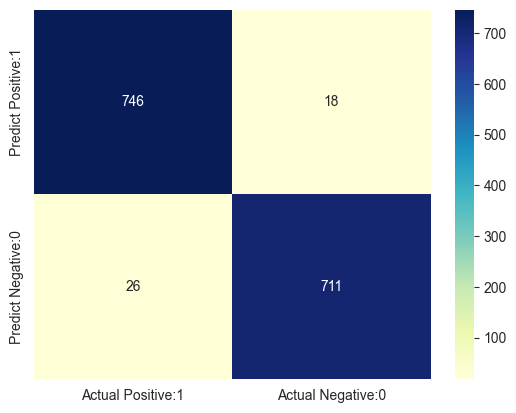

In [42]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.97       764
        Male       0.98      0.96      0.97       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

